In [151]:
import pandas as pd
import numpy as np

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt

import seaborn as sns

sns.set() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

In [210]:
df = pd.read_excel('data/6-6日实验数据94人.xlsx')
df = df.dropna(how='all',axis=1)
df

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,...,demographics.1.player.call_back,demographics.1.player.phone,demographics.1.player.happy,demographics.1.group.id_in_subsession,demographics.1.subsession.round_number,results_payment.1.player.id_in_group,results_payment.1.player.payoff,results_payment.1.player.final_payment,results_payment.1.group.id_in_subsession,results_payment.1.subsession.round_number
0,1,jzjabtoc,pc_01,0,117,117,results_payment,Results,2023-06-06 02:06:33.102,1,...,1,13533607389,2,1,1,1,0,31.98,1,1
1,2,m05vizam,pc_02,0,117,117,results_payment,Results,2023-06-06 02:06:35.983,1,...,1,NaN,6,1,1,2,0,31.60,1,1
2,3,o135ko6y,pc_03,0,117,117,results_payment,Results,2023-06-06 02:06:40.522,1,...,1,NaN,6,1,1,3,0,48.60,1,1
3,4,a2mdbuef,pc_04,0,117,117,results_payment,Results,2023-06-06 02:06:43.970,1,...,1,NaN,5,1,1,4,0,53.00,1,1
4,5,iu4vt42g,pc_05,0,117,117,results_payment,Results,2023-06-06 02:06:47.890,1,...,1,NaN,4,1,1,5,0,50.60,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,18,pc2dx6f4,pc_18,0,117,117,results_payment,Results,2023-06-06 07:07:31.347,1,...,1,15816550068,6,1,1,18,0,47.00,1,1
90,19,ye4pfqln,pc_19,0,117,117,results_payment,Results,2023-06-06 07:07:35.243,1,...,1,NaN,8,1,1,19,0,44.00,1,1
91,20,ch9xbbhk,pc_20,0,117,117,results_payment,Results,2023-06-06 07:07:39.267,1,...,1,15607327819,5,1,1,20,0,53.10,1,1
92,21,c1356c92,pc_21,0,117,117,results_payment,Results,2023-06-06 07:07:45.608,1,...,1,NaN,8,1,1,21,0,44.00,1,1


In [211]:
def select_by_app(df, app_name, split_col_name = False):
    """
    根据app_name，提取某个app的数据
    :param df: oTree数据
    :param app_name:  app的名字
    :param split_col: 把列名重组为多重列名
    :return: app的数据
    """

    cols = df.columns[df.columns.str.startswith(app_name + '.')]
    res = df[cols]

    if split_col_name:
        res.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in res.columns])
    return res


df_ug = select_by_app(df, 'ug')
df_ug

,ug.1.player.id_in_group,ug.1.player.role,ug.1.player.payoff,ug.1.player.treatment,ug.1.player.choice,ug.1.player.respond,ug.1.player.profit,ug.1.player.partner_profit,ug.1.player.offer,ug.1.player.hope,...,ug.10.player.partner_profit,ug.10.player.offer,ug.10.player.hope,ug.10.player.guess,ug.10.group.id_in_subsession,ug.10.group.choice,ug.10.group.respond,ug.10.group.real_plan,ug.10.group.offer,ug.10.subsession.round_number
0,1,提议者,0,cue,A,NaN,200.0,100,0.0,NaN,...,140,0.0,NaN,NaN,3,A,1,A,0,10
1,1,提议者,0,cue,A,NaN,100.0,100,0.0,NaN,...,260,NaN,60.0,0.0,1,B,0,A,20,10
2,2,回应者,0,no_cue,NaN,0.0,100.0,100,NaN,50.0,...,140,0.0,NaN,NaN,11,A,1,A,0,10
3,1,提议者,0,no_cue,A,NaN,100.0,100,0.0,NaN,...,260,NaN,50.0,0.0,9,A,1,A,40,10
4,2,回应者,0,cue,NaN,1.0,120.0,200,NaN,50.0,...,260,NaN,60.0,50.0,3,A,1,A,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2,回应者,0,cue,NaN,1.0,150.0,200,NaN,50.0,...,260,NaN,80.0,60.0,6,A,1,A,10,10
90,1,提议者,0,no_cue,A,NaN,175.0,100,25.0,NaN,...,140,30.0,NaN,NaN,11,A,1,A,30,10
91,2,回应者,0,no_cue,NaN,1.0,100.0,200,NaN,50.0,...,260,NaN,100.0,0.0,7,A,1,A,10,10
92,1,提议者,0,cue,A,NaN,150.0,100,50.0,NaN,...,140,10.0,NaN,NaN,6,A,1,A,10,10


In [212]:
def select_by_round(df, round_number):
    """
    按round_number取出对应的数据
    :param df: oTree的数据
    :param round_number: round number
    :return: 指定轮的数据
    """
    cols = [col for col in df.columns if col.split('.')[1] == str(round_number)]
    return df[cols]

round_2_df = select_by_round(df_ug, 2)
round_2_df

,ug.2.player.id_in_group,ug.2.player.role,ug.2.player.payoff,ug.2.player.treatment,ug.2.player.choice,ug.2.player.respond,ug.2.player.profit,ug.2.player.partner_profit,ug.2.player.offer,ug.2.player.hope,ug.2.player.guess,ug.2.group.id_in_subsession,ug.2.group.choice,ug.2.group.respond,ug.2.group.real_plan,ug.2.group.offer,ug.2.subsession.round_number
0,1,提议者,0,cue,A,NaN,100,100,0.0,NaN,NaN,4,A,0,B,0,2
1,2,回应者,0,cue,NaN,1.0,170,300,NaN,100.0,0.0,5,A,1,A,70,2
2,2,回应者,0,no_cue,NaN,1.0,150,300,NaN,100.0,0.0,8,A,1,A,50,2
3,2,回应者,0,no_cue,NaN,0.0,100,100,NaN,30.0,0.0,10,A,0,B,0,2
4,1,提议者,0,cue,A,NaN,230,100,70.0,NaN,NaN,5,A,1,A,70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2,回应者,0,cue,NaN,1.0,150,300,NaN,100.0,50.0,2,A,1,A,50,2
90,1,提议者,0,no_cue,A,NaN,250,100,50.0,NaN,NaN,7,A,1,A,50,2
91,1,提议者,0,no_cue,A,NaN,250,100,50.0,NaN,NaN,10,A,1,A,50,2
92,2,回应者,0,cue,NaN,0.0,100,100,NaN,50.0,0.0,5,A,0,B,0,2


In [213]:
# 定义一个过滤函数
def select_by_vars(df, vars):
    """
    从oTree的数据中，提取指定的player变量的列。提取的依据是列名的最后一部分
    :param df: oTree的DataFrame
    :param vars: 一个str，或者list[str]，指定变量名，用于匹配列名的最后一部分
    :return: 包括自定变量的列的df
    """
    if not isinstance(vars, list):
        vars = [vars]

    cols = df.columns
    return df.filter(items = [col for col in cols if col.split('.')[-1] in vars and col.split('.')[-2] == 'player'])

tmp_df = select_by_vars(round_2_df, ['role', 'treatment', 'choice'])
tmp_df

,ug.2.player.role,ug.2.player.treatment,ug.2.player.choice
0,提议者,cue,A
1,回应者,cue,NaN
2,回应者,no_cue,NaN
3,回应者,no_cue,NaN
4,提议者,cue,A
...,...,...,...
89,回应者,cue,NaN
90,提议者,no_cue,A
91,提议者,no_cue,A
92,回应者,cue,NaN


In [208]:
tmp_df[select_by_vars(tmp_df, 'role').values == '提议者']

,ug.2.player.role,ug.2.player.treatment,ug.2.player.choice
0,提议者,cue,A
4,提议者,cue,A
7,提议者,no_cue,A
8,提议者,cue,A
9,提议者,cue,A
10,提议者,no_cue,A
12,提议者,cue,A
14,提议者,no_cue,A
18,提议者,no_cue,A
21,提议者,cue,B


## 第一阶段的选择choice

1. 分round比较不同treatment
2. 分3种帕累托情况比较treatment

提取ug的数据到df_ug

In [12]:
ug_cols = df.columns[df.columns.str.startswith('ug.')]
df_ug = df[ug_cols]
df_ug

,ug.1.player.id_in_group,ug.1.player.role,ug.1.player.payoff,ug.1.player.treatment,ug.1.player.choice,ug.1.player.respond,ug.1.player.profit,ug.1.player.partner_profit,ug.1.player.offer,ug.1.player.hope,...,ug.10.player.partner_profit,ug.10.player.offer,ug.10.player.hope,ug.10.player.guess,ug.10.group.id_in_subsession,ug.10.group.choice,ug.10.group.respond,ug.10.group.real_plan,ug.10.group.offer,ug.10.subsession.round_number
0,1,提议者,0,cue,A,NaN,200.0,100,0.0,NaN,...,140,0.0,NaN,NaN,3,A,1,A,0,10
1,1,提议者,0,cue,A,NaN,100.0,100,0.0,NaN,...,260,NaN,60.0,0.0,1,B,0,A,20,10
2,2,回应者,0,no_cue,NaN,0.0,100.0,100,NaN,50.0,...,140,0.0,NaN,NaN,11,A,1,A,0,10
3,1,提议者,0,no_cue,A,NaN,100.0,100,0.0,NaN,...,260,NaN,50.0,0.0,9,A,1,A,40,10
4,2,回应者,0,cue,NaN,1.0,120.0,200,NaN,50.0,...,260,NaN,60.0,50.0,3,A,1,A,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2,回应者,0,cue,NaN,1.0,150.0,200,NaN,50.0,...,260,NaN,80.0,60.0,6,A,1,A,10,10
90,1,提议者,0,no_cue,A,NaN,175.0,100,25.0,NaN,...,140,30.0,NaN,NaN,11,A,1,A,30,10
91,2,回应者,0,no_cue,NaN,1.0,100.0,200,NaN,50.0,...,260,NaN,100.0,0.0,7,A,1,A,10,10
92,1,提议者,0,cue,A,NaN,150.0,100,50.0,NaN,...,140,10.0,NaN,NaN,6,A,1,A,10,10


查看第一轮的choice，结果都是A

In [25]:
(df_ug.query('`ug.1.player.role` == "提议者"')['ug.1.player.choice']=='A').mean()

1.0

In [37]:
round_number = 3

df_ug.query(f'`ug.{round_number}.player.role` == "提议者"')[f'ug.{round_number}.player.choice'].value_counts()


A    45
B     2
Name: ug.3.player.choice, dtype: int64

In [56]:
df_ug_choice = df_ug.filter(regex="player\.treatment$|player\.choice$")
df_ug_choice

,ug.1.player.treatment,ug.1.player.choice,ug.2.player.treatment,ug.2.player.choice,ug.3.player.treatment,ug.3.player.choice,ug.4.player.treatment,ug.4.player.choice,ug.5.player.treatment,ug.5.player.choice,ug.6.player.treatment,ug.6.player.choice,ug.7.player.treatment,ug.7.player.choice,ug.8.player.treatment,ug.8.player.choice,ug.9.player.treatment,ug.9.player.choice,ug.10.player.treatment,ug.10.player.choice
0,cue,A,cue,A,cue,A,cue,NaN,cue,NaN,cue,A,cue,NaN,cue,NaN,cue,NaN,cue,A
1,cue,A,cue,NaN,cue,A,cue,A,cue,A,cue,A,cue,NaN,cue,A,cue,A,cue,NaN
2,no_cue,NaN,no_cue,NaN,no_cue,A,no_cue,A,no_cue,A,no_cue,B,no_cue,A,no_cue,A,no_cue,NaN,no_cue,A
3,no_cue,A,no_cue,NaN,no_cue,A,no_cue,A,no_cue,NaN,no_cue,A,no_cue,NaN,no_cue,A,no_cue,NaN,no_cue,NaN
4,cue,NaN,cue,A,cue,NaN,cue,A,cue,NaN,cue,NaN,cue,A,cue,A,cue,NaN,cue,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,cue,NaN,cue,NaN,cue,A,cue,NaN,cue,A,cue,NaN,cue,A,cue,NaN,cue,A,cue,NaN
90,no_cue,A,no_cue,A,no_cue,NaN,no_cue,NaN,no_cue,NaN,no_cue,NaN,no_cue,NaN,no_cue,A,no_cue,NaN,no_cue,A
91,no_cue,NaN,no_cue,A,no_cue,NaN,no_cue,A,no_cue,A,no_cue,NaN,no_cue,A,no_cue,A,no_cue,A,no_cue,NaN
92,cue,A,cue,NaN,cue,B,cue,B,cue,B,cue,NaN,cue,A,cue,NaN,cue,NaN,cue,A


In [57]:
df_ug_choice.columns

Index(['ug.1.player.treatment', 'ug.1.player.choice', 'ug.2.player.treatment',
       'ug.2.player.choice', 'ug.3.player.treatment', 'ug.3.player.choice',
       'ug.4.player.treatment', 'ug.4.player.choice', 'ug.5.player.treatment',
       'ug.5.player.choice', 'ug.6.player.treatment', 'ug.6.player.choice',
       'ug.7.player.treatment', 'ug.7.player.choice', 'ug.8.player.treatment',
       'ug.8.player.choice', 'ug.9.player.treatment', 'ug.9.player.choice',
       'ug.10.player.treatment', 'ug.10.player.choice'],
      dtype='object')

In [59]:
df_ug_choice.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in df_ug_choice.columns])
df_ug_choice

ug                                                            \
           1                2                3                4          
      player           player           player           player          
   treatment choice treatment choice treatment choice treatment choice   
0        cue      A       cue      A       cue      A       cue    NaN   
1        cue      A       cue    NaN       cue      A       cue      A   
2     no_cue    NaN    no_cue    NaN    no_cue      A    no_cue      A   
3     no_cue      A    no_cue    NaN    no_cue      A    no_cue      A   
4        cue    NaN       cue      A       cue    NaN       cue      A   
..       ...    ...       ...    ...       ...    ...       ...    ...   
89       cue    NaN       cue    NaN       cue      A       cue    NaN   
90    no_cue      A    no_cue      A    no_cue    NaN    no_cue    NaN   
91    no_cue    NaN    no_cue      A    no_cue    NaN    no_cue      A   
92       cue      A       cue    NaN       cue      B       cue      B   
93       cue    NaN       cue    NaN       cue    NaN       cue    NaN   

                                                                        \
           5                6                7                8          
      player           player           player           player          
   treatment choice treatment choice treatment choice treatment choice   
0        cue    NaN       cue      A       cue    NaN       cue    NaN   
1        cue      A       cue      A       cue    NaN       cue      A   
2     no_cue      A    no_cue      B    no_cue      A    no_cue      A   
3     no_cue    NaN    no_cue      A    no_cue    NaN    no_cue      A   
4        cue    NaN       cue    NaN       cue      A       cue      A   
..       ...    ...       ...    ...       ...    ...       ...    ...   
89       cue      A       cue    NaN       cue      A       cue    NaN   
90    no_cue    NaN    no_cue    NaN    no_cue    NaN    no_cue      A   
91    no_cue      A    no_cue    NaN    no_cue      A    no_cue      A   
92       cue      B       cue    NaN       cue      A       cue    NaN   
93       cue    NaN       cue    NaN       cue    NaN       cue    NaN   

                                      
           9               10         
      player           player         
   treatment choice treatment choice  
0        cue    NaN       cue      A  
1        cue      A       cue    NaN  
2     no_cue    NaN    no_cue      A  
3     no_cue    NaN    no_cue    NaN  
4        cue    NaN       cue    NaN  
..       ...    ...       ...    ...  
89       cue      A       cue    NaN  
90    no_cue    NaN    no_cue      A  
91    no_cue      A    no_cue    NaN  
92       cue    NaN       cue      A  
93       cue    NaN       cue    NaN  

[94 rows x 20 columns]

In [61]:
grouped = df_ug_choice.groupby(level=1, axis=1)
proportions = grouped.apply(lambda g: (g.xs("player", level=2, axis=1).choice == "A").mean())
proportions

AttributeError: 'DataFrame' object has no attribute 'choice'

In [72]:
round_number = 1
round_df = df_ug.filter(regex = f'ug\.{round_number}\.player\.(role|treatment|choice)')
round_df.columns = [x.replace(f'ug.1.player.','') for x in round_df.columns]
round_df

,role,treatment,choice
0,提议者,cue,A
1,提议者,cue,A
2,回应者,no_cue,NaN
3,提议者,no_cue,A
4,回应者,cue,NaN
...,...,...,...
89,回应者,cue,NaN
90,提议者,no_cue,A
91,回应者,no_cue,NaN
92,提议者,cue,A


In [83]:
round_df.query('role == "提议者"').groupby("treatment")["choice"].apply(lambda x: (x == "A").mean())

treatment
cue       1.0
no_cue    1.0
Name: choice, dtype: float64

In [115]:
def get_A_percent(df_ug,round_number):
    round_df = df_ug.filter(regex = f'ug\.{round_number}\.player\.(role|treatment|choice)')
    round_df.columns = [x.replace(f'ug.{round_number}.player.','') for x in round_df.columns]

    res =  round_df.query('role == "提议者"').groupby("treatment")["choice"].apply(lambda x: (x == "A").mean())
    res = pd.DataFrame(res)
    res.columns = ['round_' + str(round_number)]
    #print(res)
    return res

get_A_percent(df_ug,1)


,round_1
treatment,
cue,1.0
no_cue,1.0


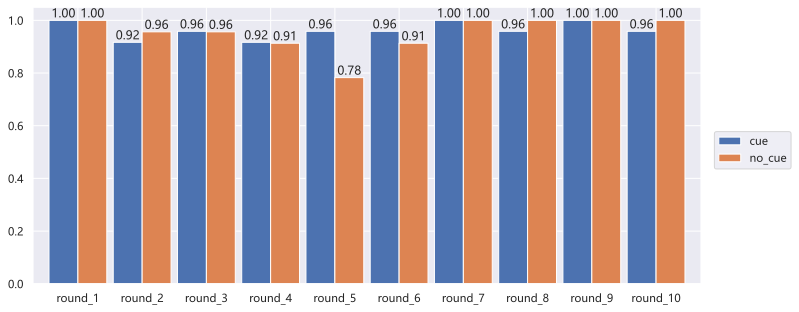

In [146]:
ax = pd.concat([get_A_percent(df_ug,i) for i in range(1,11)],axis=1).T.plot.bar(width=0.9,figsize=(12,5))
ax.bar_label(ax.containers[0],fmt='%.2f' )
ax.bar_label(ax.containers[1],fmt='%.2f' )
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0);

,ug.1.player.id_in_group,ug.1.player.role,ug.1.player.payoff,ug.1.player.treatment,ug.1.player.choice,ug.1.player.respond,ug.1.player.profit,ug.1.player.partner_profit,ug.1.player.offer,ug.1.player.hope,...,ug.10.player.partner_profit,ug.10.player.offer,ug.10.player.hope,ug.10.player.guess,ug.10.group.id_in_subsession,ug.10.group.choice,ug.10.group.respond,ug.10.group.real_plan,ug.10.group.offer,ug.10.subsession.round_number
0,1,提议者,0,cue,A,NaN,200.0,100,0.0,NaN,...,140,0.0,NaN,NaN,3,A,1,A,0,10
1,1,提议者,0,cue,A,NaN,100.0,100,0.0,NaN,...,260,NaN,60.0,0.0,1,B,0,A,20,10
2,2,回应者,0,no_cue,NaN,0.0,100.0,100,NaN,50.0,...,140,0.0,NaN,NaN,11,A,1,A,0,10
3,1,提议者,0,no_cue,A,NaN,100.0,100,0.0,NaN,...,260,NaN,50.0,0.0,9,A,1,A,40,10
4,2,回应者,0,cue,NaN,1.0,120.0,200,NaN,50.0,...,260,NaN,60.0,50.0,3,A,1,A,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2,回应者,0,cue,NaN,1.0,150.0,200,NaN,50.0,...,260,NaN,80.0,60.0,6,A,1,A,10,10
90,1,提议者,0,no_cue,A,NaN,175.0,100,25.0,NaN,...,140,30.0,NaN,NaN,11,A,1,A,30,10
91,2,回应者,0,no_cue,NaN,1.0,100.0,200,NaN,50.0,...,260,NaN,100.0,0.0,7,A,1,A,10,10
92,1,提议者,0,cue,A,NaN,150.0,100,50.0,NaN,...,140,10.0,NaN,NaN,6,A,1,A,10,10


In [150]:
df

,player.treatment1,player.treatment2,player.choice1,player.choice2,other_column
0,1,4,A,D,7
1,2,5,B,E,8
2,3,6,C,F,9
